In [59]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import nbinom

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [65]:
import math
def at_least_one(prob, defprob):
    sample_size = math.ceil(math.log(1-prob) / math.log(1-defprob));
    return sample_size;

num = at_least_one(0.85, 0.03)
print("We should ask for " + str(num) + " independent samples")

We should ask for 63 independent samples


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [66]:
num2 = at_least_one(0.95, 0.04)
print("We should ask for " + str(num2) + " independent samples")

We should ask for 74 independent samples


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

Independent samples required: 78


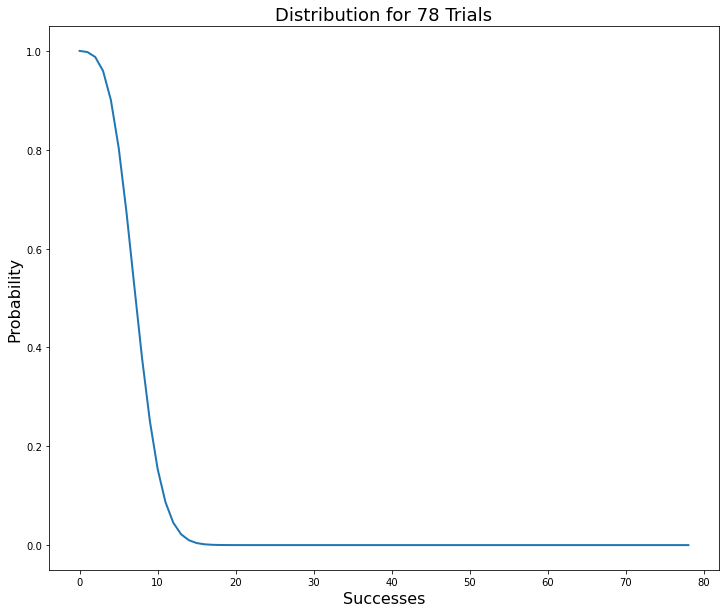

In [67]:
import numpy as np 
import scipy.stats
import matplotlib.pyplot as pltb

#1
n = np.arange(5, 100)
survival = scipy.stats.binom.sf(4, n, 0.1)
indep_samples = n[survival >= 0.9][0]


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x = np.arange(0, indep_samples+1, 1)
ax.plot(x, scipy.stats.binom.sf(x, indep_samples, 0.1), lw=2)
ax.set_xlabel("Successes", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
ax.set_title("Distribution for %i Trials" % indep_samples, fontsize=18)

print("Independent samples required: " + str(indep_samples))
plt.show()

Independent samples required: 64


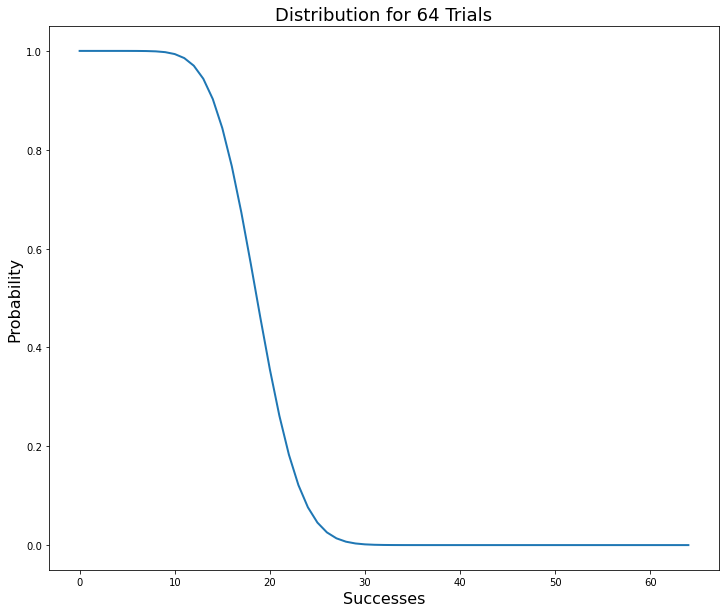

In [68]:
#2
n_2 = np.arange(15, 100)
survival_2 = scipy.stats.binom.sf(14, n_2, 0.3)
indep_samples_2 = n_2[survival_2 >= 0.9][0]
indep_samples_2


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x = np.arange(0, indep_samples_2+1, 1)
ax.plot(x, scipy.stats.binom.sf(x, indep_samples_2, 0.3), lw=2)
ax.set_xlabel("Successes", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
ax.set_title("Distribution for %i Trials" % indep_samples_2, fontsize=18)

print("Independent samples required: " + str(indep_samples_2))
plt.show()

In [61]:
X1 = nbinom(5, 0.1, loc=5)
X2 = nbinom(15, 0.3, loc=15)

In [60]:
r1 = 5
p1 = 0.1

r2 = 15
p2 = 0.3

mean_X1, var_X1 = nbinom.stats(r1, p1, loc=r1)
mean_X2, var_X2 = nbinom.stats(r2, p2, loc=r2)
print(f'E(X1_1) = {mean_X1}, Var(X1_1) = {var_X1}')
print(f'E(X1_2) = {mean_X2}, Var(X1_2) = {var_X2}')

E(X1_1) = 50.0, Var(X1_1) = 450.0
E(X1_2) = 50.0, Var(X1_2) = 116.66666666666667


In the first part, products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.  In the second part, we triple the probability of getting a defective product, but we also triple the number of defective products desired in the batch.  So why is the number of independent samples required different for the two cases?  After calculating the mean and the variance for both distributions, we can see that the mean is the same but the variance for the first case is larger than the variance for the second case.  This means that the second distribution is clustered more closely around the mean, its CDF begins to accumulate later than the CDF of the first distribution, but grows quickly around the mean.  The CDF of the first distribution begins to accumulate early but grows more slowly than the CDF of the second distribution.  Plotting the survival function we see that we end up needing 64 independent samples if we want a 90% probability of at least 15 defective products in the batch, and 78 independent samples for at least 5 defective products in the batch.  
More samples are required for the distribution with the greater variance.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [17]:
# reverse enginer the data to fit the requirements

sh_data1 = np.array([1400, 1600, 2400, 4000, 4575, 4600, 4600, 4600, 4600, 6295, 8000, 9800, 9900, 9990, 12090, 12350] * int(16000/16))

sh_pop = np.size(sh_data1)
sh_mean = np.mean(sh_data1)
sh_median = np.median(sh_data1)
sh_iqr = np.percentile(sh_data1, 75) - np.percentile(sh_data1, 25)
print('Stochastic Heights Mean: {}. Stochastic Heights Median: {}. Stochastic Heights IQR: {}'.format(sh_mean, sh_median, sh_iqr))


rg_data1 = np.array([300, 400, 600, 1500, 4600, 4600, 4800, 5000, 7100, 8000, 9300] * int(22000/11))

rg_pop = np.size(rg_data1)
rg_mean = np.mean(rg_data1)
rg_median = np.median(rg_data1)
rg_iqr = np.percentile(rg_data1, 75) - np.percentile(rg_data1, 25)
print('Random Grove Mean: {}. Random Grove Median: {}. Random Grove IQR: {}'.format(rg_mean, rg_median, rg_iqr))

Stochastic Heights Mean: 6300.0. Stochastic Heights Median: 4600.0. Stochastic Heights IQR: 5393.75
Random Grove Mean: 4200.0. Random Grove Median: 4600.0. Random Grove IQR: 6500.0


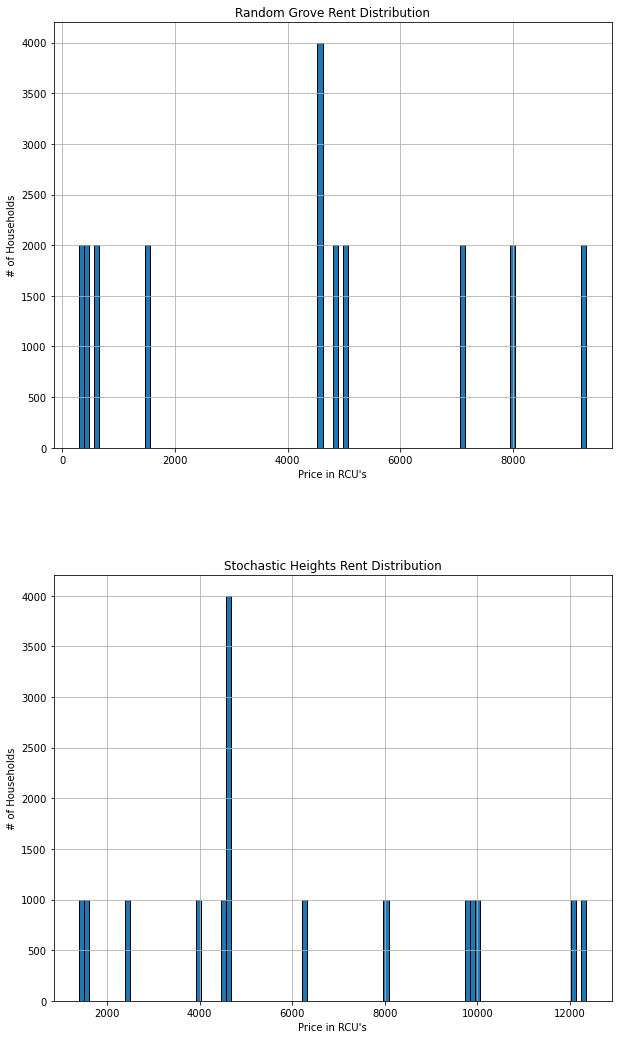

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10,18))

pd.DataFrame(rg_data1).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[0])
axes[0].set_title('Random Grove Rent Distribution')
axes[0].set_xlabel("Price in RCU's")
axes[0].set_ylabel('# of Households')
pd.DataFrame(sh_data1).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[1])
axes[1].set_title('Stochastic Heights Rent Distribution')
axes[1].set_xlabel("Price in RCU's")
axes[1].set_ylabel('# of Households');

In [19]:
sh_data = np.array([1450, 1500, 2500, 3000, 4400, 4550, 4600, 4600, 5300, 7000, 12000, 15000, 16000] * int(16000/13))

sh_pop = np.size(sh_data)
sh_mean = np.mean(sh_data)
sh_median = np.median(sh_data)
sh_iqr = np.percentile(sh_data, 75) - np.percentile(sh_data, 25)
print('Stochastic Heights Mean: {}. Stochastic Heights Median: {}. Stochastic Heights IQR: {}'.format(sh_mean, sh_median, sh_iqr))


rg_data = np.array([50, 300, 400, 600, 750, 4000, 4600, 4600, 4800, 5000, 6200, 8000, 9600, 9900] * int(22000/14))

rg_pop = np.size(rg_data)
rg_mean = np.mean(rg_data)
rg_median = np.median(rg_data)
rg_iqr = np.percentile(rg_data, 75) - np.percentile(rg_data, 25)
print('Random Grove Mean: {}. Random Grove Median: {}. Random Grove IQR: {}'.format(rg_mean, rg_median, rg_iqr))

Stochastic Heights Mean: 6300.0. Stochastic Heights Median: 4600.0. Stochastic Heights IQR: 4000.0
Random Grove Mean: 4200.0. Random Grove Median: 4600.0. Random Grove IQR: 5600.0


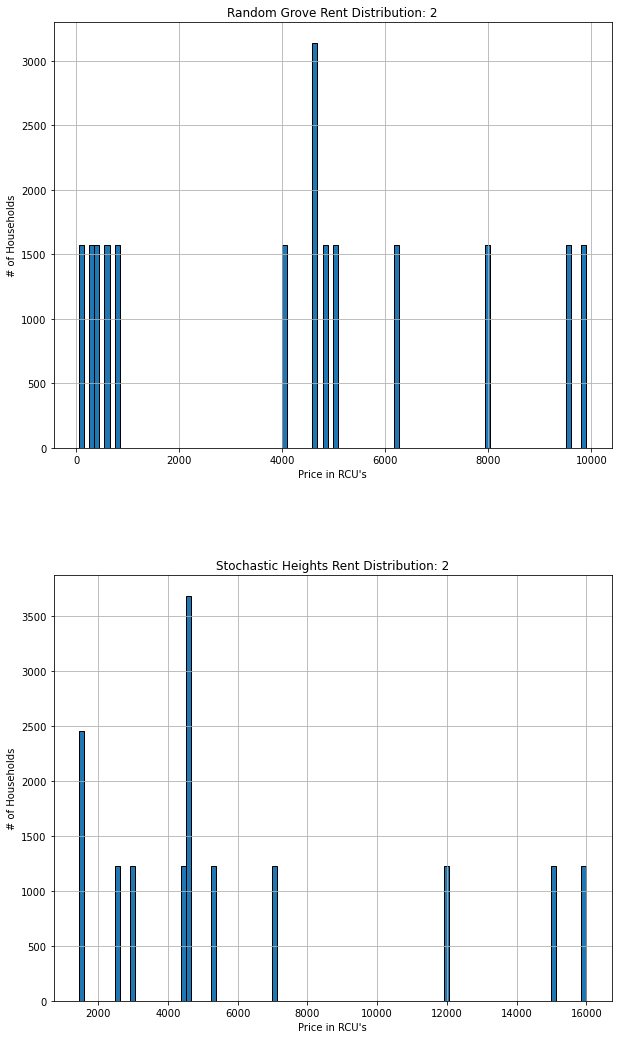

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10,18))

pd.DataFrame(rg_data).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[0])
axes[0].set_title('Random Grove Rent Distribution: 2')
axes[0].set_xlabel("Price in RCU's")
axes[0].set_ylabel('# of Households')
pd.DataFrame(sh_data).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[1])
axes[1].set_title('Stochastic Heights Rent Distribution: 2')
axes[1].set_xlabel("Price in RCU's")
axes[1].set_ylabel('# of Households');

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [21]:
sh_data3 = np.array([1400, 1600, 2400, 4400, 4550, 4600, 4600, 6000, 8850, 9200, 9900, 12050, 12350] * int(16000/13))

sh_pop = np.size(sh_data3)
sh_mean = np.mean(sh_data3)
sh_median = np.median(sh_data3)
sh_iqr = np.percentile(sh_data3, 75) - np.percentile(sh_data3, 25)
sh_var = int(np.var(sh_data3))
print('Stochastic Heights Mean: {}. Stochastic Heights Median: {}. Stochastic Heights IQR: {}.'.format(sh_mean, sh_median, sh_iqr))


rg_data3 = np.array([600, 300, 400, 5000,  4600, 4600, 1500, 4800, 7100, 8000, 9300] * int(22000/11))

rg_pop = np.size(rg_data3)
rg_mean = np.mean(rg_data3)
rg_median = np.median(rg_data3)
rg_iqr = np.percentile(rg_data3, 75) - np.percentile(rg_data3, 25)
rg_var = int(np.var(rg_data3))
print('Random Grove Mean: {}. Random Grove Median: {}. Random Grove IQR: {}.'.format(rg_mean, rg_median, rg_iqr))
print('Stochastic Heights {} > Random Grove {} variance'.format(sh_var, rg_var))

Stochastic Heights Mean: 6300.0. Stochastic Heights Median: 4600.0. Stochastic Heights IQR: 4800.0.
Random Grove Mean: 4200.0. Random Grove Median: 4600.0. Random Grove IQR: 6500.0.
Stochastic Heights 13183846 > Random Grove 9098181 variance


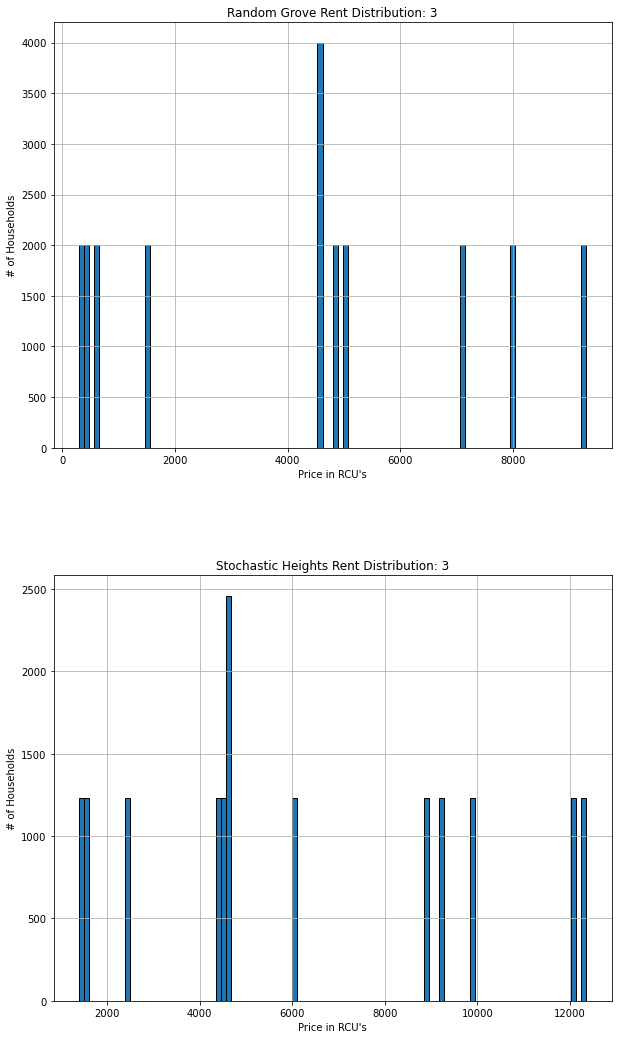

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(10,18))

pd.DataFrame(rg_data3).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[0])
axes[0].set_title('Random Grove Rent Distribution: 3')
axes[0].set_xlabel("Price in RCU's")
axes[0].set_ylabel('# of Households')
pd.DataFrame(sh_data3).hist(bins=100, edgecolor="k", linewidth=1, ax=axes[1])
axes[1].set_title('Stochastic Heights Rent Distribution: 3')
axes[1].set_xlabel("Price in RCU's")
axes[1].set_ylabel('# of Households');

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [23]:
sh_phi_data = np.array([1000, 1200, 1900, 5000, 7500, 12000, 12000, 14000, 15500, 20000, 23000, 24400, 25000] * int(16000/13))
sh_phi_median = np.median(sh_phi_data)
sh_phi_mean = np.mean(sh_phi_data)
print("Per Household Income -- Stochastic Heights -- Median:{}. Mean:{}".format(sh_phi_median, sh_phi_mean))

rg_phi_data = np.array([2800, 3900, 4000, 7600, 7900, 8000, 9000, 11900, 12000, 12750, 13650] * int(22000/11))
rg_phi_median = np.median(rg_phi_data)
rg_phi_mean = np.mean(rg_phi_data)
print("Per Household Income -- Random Grove -- Median:{}. Mean:{}".format(rg_phi_median,rg_phi_mean))

Per Household Income -- Stochastic Heights -- Median:12000.0. Mean:12500.0
Per Household Income -- Random Grove -- Median:8000.0. Mean:8500.0


In [24]:
sh_cov = 0.97 * (np.var(sh_phi_data))**0.5 * (np.var(sh_data3))**0.5
rg_cov = 0.89 * (np.var(rg_phi_data))**0.5 * (np.var(rg_data3))**0.5
print("Calculated Cov(rent, PHI): Stochastic Heights: {} and Random Grove: {}.".format(sh_cov, rg_cov))

Calculated Cov(rent, PHI): Stochastic Heights: 29784011.709221266 and Random Grove: 9711793.301185867.


In [25]:
sh_obs_cov = np.cov(sh_data3,sh_phi_data)[0][1]
rg_obs_cov = np.cov(rg_data3,rg_phi_data)[0][1]
print( sh_obs_cov, rg_obs_cov)
print(sh_obs_cov/sh_cov, rg_obs_cov/rg_cov)

abs(1-sh_obs_cov/sh_cov), abs(1-rg_obs_cov/rg_cov) # are both within 1%

29717243.104634434 9787263.0574117
0.9977582400504442 1.0077709392987821


(0.002241759949555777, 0.007770939298782142)

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

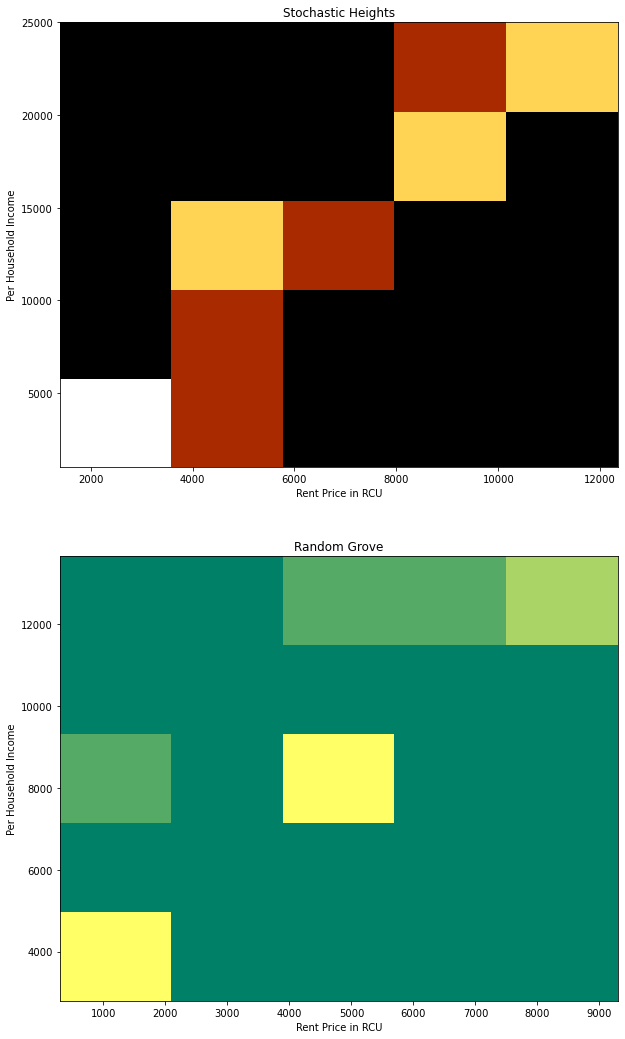

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10,18))

axes[0].hist2d(x=sh_data3,y=sh_phi_data,cmap='afmhot',bins=5)
axes[0].set_xlabel('Rent Price in RCU')
axes[0].set_ylabel('Per Household Income')
axes[0].set_title('Stochastic Heights')

axes[1].hist2d(x=rg_data3,y=rg_phi_data,cmap='summer',bins=5)
axes[1].set_xlabel('Rent Price in RCU')
axes[1].set_ylabel('Per Household Income')
axes[1].set_title('Random Grove');

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

**The Empirical Formula for the Centralized Third Moment of Y:**

$\gamma_3 = \frac {1}{n}\sum_{i=1}^{n} (Y_i - \mu)^3$

**The Theoretical Formula for the Centralized Third Moment of the Binomial Distribution:**

$\gamma_3 = n \cdot p \cdot (1-p) \cdot (1-2p)$


In [42]:
#100 experiments of a multinomial distribution with n = 20 and probability vector p
import scipy as sp
from scipy import stats

p = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
data = np.random.multinomial(20, p, size=100)  

In [49]:
selected = data[:, [1,2,3]]  #select columns representing X2, X3, and X4
Y = np.sum(selected, axis=1) #sum along the rows --> 3 columnsX100 rows becomes 1 column of 100 values
print(Y)

[10  3  5  5  8  6  7  3  4  8  6  4  6  4  4  4  3  6  6  6  9  8  7  5
  7  8  7  4  7  5  4 10  5  7  6  7  5  8  8  4  2  3  8  9  4  7  7  5
  6  4  3  6  4  7  3  6 11  6  7  6  4  5  8  5  7  7  6  6  7  7  4  7
  3  9  6  4  7  7  2  8  6 12  5  5  2  6  8  5  8  8 10  6  8  4  5  7
  6  5  6  5]


In [50]:
#calculate the empirical centralized 3rd moment of Y
emp_3rd_moment = scipy.stats.moment(Y, moment=3) 
print("The empirical centralized third moment of Y is " + str(emp_3rd_moment))

The empirical centralized third moment of Y is 2.3278979999999967


In [51]:
#function that returns the centralized 3rd moment of the binomial distribution
def third_moment_binom(n,p):  
    return n*p*(1-p)*(1-(2*p))

In [52]:
#call previous function with values n = 20, p = 0.3
theoretical = third_moment_binom(20, 0.3)
print("The theoretical centralized third moment of the binomial distribution is " + str(theoretical))

The theoretical centralized third moment of the binomial distribution is 1.6799999999999997


*The number of experiments conducted in this exercise (100) is too low to get an accurate calculation of the centralized third moment of Y.  The greater the number of trials we run, the closer the empirical moment will approach the theoretical centralized third moment (~1.68)*

In [58]:
one_million_experiments = np.random.multinomial(20, p, size=1000000)
x2_x3_x4 = one_million_experiments[:, [1,2,3]]
Y1 = np.sum(x2_x3_x4, axis=1)
empirical = scipy.stats.moment(Y1, moment=3)
print(str(empirical))

1.6890672086268144


### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

**Variance of the sum of three random variables: X, Y, Z**

$Var(X + Y + Z) = E((X + Y + Z)^2) - (E(X + Y + Z)) = $ 

$E(X^2 + 2XY + 2XZ + Y^2 + 2YZ + Z^2) - ((E(X))^2 + 2E(X)E(Y) + 2E(X)E(Z) + (E(Y))^2 + 2E(Y)E(Z) + (E(Z))^2 = $

$(E(X^2) - (E(X))^2) + (E(Y^2) - (E(Y))^2) + (E(Z^2) - (E(Z))^2) + 2(E(XY) - E(X)E(Y)) + 2(E(XZ) - E(X)E(Z)) + 2(E(YZ) - E(Y)E(Z))$



**From the definition of variance and covariance, we know that:**

$Var(X) = (E(X^2) - (E(X))^2), \ Cov(X,Y) = E(XY) - E(X)E(Y)$

$Var(Y) = (E(Y^2) - (E(Y))^2), \ Cov(X,Z) = E(XZ) - E(X)E(Z)$

$Var(Z) = (E(Z^2) - (E(Z))^2), \ Cov(Y,Z) = E(YZ) - E(Y)E(Z)$



**Re-writing the previous formula, we get:**

$Var(X + Y + Z) = Var(X) + Var(Y) + Var(Z) + 2Cov(X, Y) + 2Cov(X, Z) + 2Cov(Y, Z)$

**If X, Y and Z are pairwise independent, X and Y are independent, X and Z are independent, and Y and Z are independent.  This means that each pair of variables is uncorrelated and their covariance is zero.  Therefore, in the case of pairwise independence:**

$Var(X + Y + Z) = Var(X) + Var(Y) + Var(Z)$

**If X, Y and Z are collectively independent, then all three variables are independent from one another and uncorrelated, so the covariance for each pair of variables is also zero.  Therefore, in the case of collective independence:**

$Var(X + Y + Z) = Var(X) + Var(Y) + Var(Z)$

**Collective independence of X, Y, and Z implies pairwise independence, but pairwise independence of the variables does not imply collective independence.  For example:**

Toss a fair coin twice.  The value 1 is given for heads, and 0 given for tails.  We can define three RV - X, Y, Z.

X - value of first toss is 1. 

Y - value of second toss is 1. 

Z - both tosses yield the same result.  

The probability sample space is {10, 01, 11, 00}

$P(X) = \frac {1}{2} $ 

$P(Y) = \frac {1}{2} $

$P(Z) = \frac {1}{2} $

*Here we can see that X, Y, and Z are pairwise independent*

$P(X \cap Y) = \frac {1}{4} = P(X) \cdot P(Y)$

$P(Y \cap Z) = \frac {1}{4} = P(Y) \cdot P(Z)$

$P(X \cap Z) = \frac {1}{4} = P(X) \cdot P(Z)$

*But not collectively independent*

$P(X \cap Y \cap Z) = \frac {1}{4} \neq P(X) \cdot P(Y) \cdot P(Z)$ which is equal to $\frac {1}{8}$

*Collectively independent random variables are completely independent of any combination of the other random variables, and of the other RVs themselves.  By definition then, collectively independent RVs are also pairwise independent.*


### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [30]:
def NFoldConv(P, n):
    repeats = [P]*n
    conv = np.convolve(P, P)
    
    for i in range(1, len(repeats)-1):
        conv = np.convolve(conv, repeats[i+1])
        
    return conv

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [48]:
dist = np.repeat([1/8], 8)
nfoldconv = NFoldConv(dist, 17)
nfoldconv

array([4.44089210e-16, 7.54951657e-15, 6.79456491e-14, 4.30322444e-13,
       2.15161222e-12, 9.03677133e-12, 3.31348282e-11, 1.08871578e-10,
       3.26607186e-10, 9.07134812e-10, 2.35772912e-09, 5.78267301e-09,
       1.34733957e-08, 2.99840073e-08, 6.40173488e-08, 1.31615841e-07,
       2.61380925e-07, 5.02742224e-07, 9.38663699e-07, 1.70459936e-06,
       3.01597023e-06, 5.20688185e-06, 8.78316811e-06, 1.44930374e-05,
       2.34184931e-05, 3.70901651e-05, 5.76270894e-05, 8.79011761e-05,
       1.31723541e-04, 1.94046516e-04, 2.81171100e-04, 4.00945025e-04,
       5.62931924e-04, 7.78527660e-04, 1.06099643e-03, 1.42539740e-03,
       1.88837308e-03, 2.46777400e-03, 3.18210121e-03, 4.04975813e-03,
       5.08811743e-03, 6.31242493e-03, 7.73458068e-03, 9.36185625e-03,
       1.11956238e-02, 1.32301865e-02, 1.54518068e-02, 1.78380317e-02,
       2.03574043e-02, 2.29696365e-02, 2.56262914e-02, 2.82719922e-02,
       3.08461375e-02, 3.32850623e-02, 3.55245473e-02, 3.75025442e-02,
      